In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras import models, layers
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [ ]:
gpus = tf.config.experimental

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Taro Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 427 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['taro_healthy', 'taro_leaf_blight']

In [10]:
len(dataset)

14

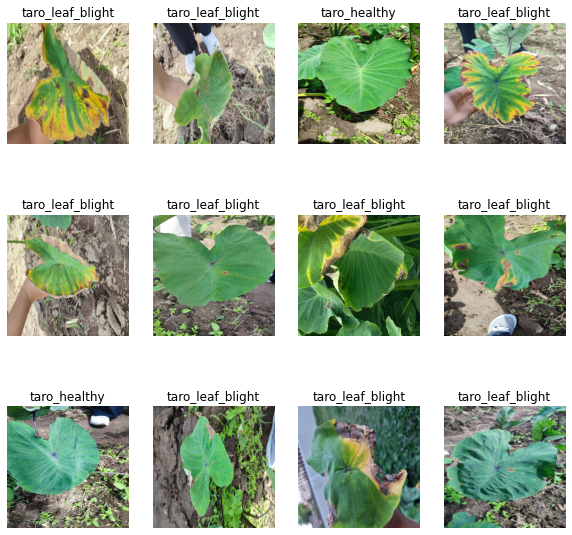

In [11]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
len(dataset)

14

In [61]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [13]:
train_size = 0.8
len(dataset)*train_size

11.200000000000001

In [14]:
train_ds = dataset.take(11)
len(train_ds)

11

In [15]:
test_ds = dataset.skip(11)
len(test_ds)

3

In [16]:
val_size = 0.1
len(dataset)*val_size

1.4000000000000001

In [17]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [18]:
test_ds = test_ds.skip(1)
len(test_ds)

2

In [19]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
   
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [20]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

11

In [22]:
len(val_ds)

1

In [23]:
len(test_ds)

2

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential ([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.Sequential([
   
    #first cnn layer
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    keras.layers.MaxPooling2D((2,2)),
    #second cnn layer
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    #fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu" ),
    layers.Dense(n_classes, activation = "softmax"),
])

model.build(input_shape = input_shape)

ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 32, 254, 254, 32)